In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
def select_nyc(dir_path, filename):
    df_int = pd.read_csv(dir_path + filename, parse_dates = ['Time Stamp'])
    nyc_ind = df_int.Name.apply(lambda x: 'N.Y.C.' in x)
    df_nyc = df_int.loc[nyc_ind,['Time Stamp', 'Name', 'Integrated Load']].reset_index(drop = True)
    output_filename = filename[:8] + 'nyc.csv'
    df_nyc.to_csv(dir_path + output_filename, index = False)
    return df_nyc

In [71]:
df_t = pd.DataFrame()
for dir_path in os.listdir('nyiso_load/'):
    if 'csv' in dir_path:
        dir_path = 'nyiso_load/' + dir_path + '/'
        for filename in os.listdir(dir_path):
            df_t = pd.concat([df_t, select_nyc(dir_path, filename)])
            

(736361.0, 736368.0)

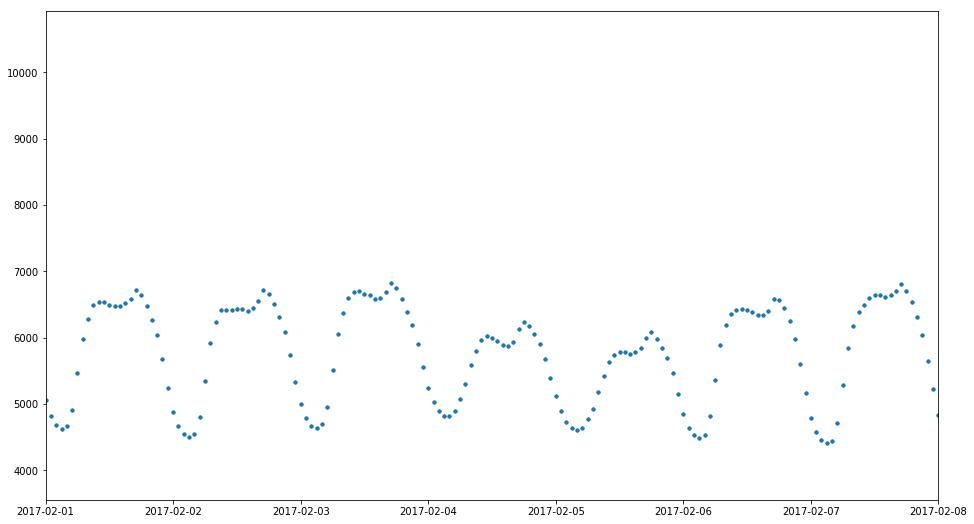

In [85]:
fig, ax = plt.subplots(figsize = (16, 9))
ax.plot(df_t.loc[:,'Time Stamp'], df_t.loc[:,'Integrated Load'], '.')
ax.set_xlim(pd.datetime(2017,2,1), pd.datetime(2017,2,8))

In [75]:
!pwd

/Users/xingliu/Documents/demo


In [76]:
df_t.to_csv('nyiso_2017.csv', index = False)

In [77]:
df_t.shape

(8686, 3)

In [78]:
df_t.head()

,Time Stamp,Name,Integrated Load
0,2017-04-12 00:00:00,N.Y.C.,4601.1
1,2017-04-12 01:00:00,N.Y.C.,4370.6
2,2017-04-12 02:00:00,N.Y.C.,4210.0
3,2017-04-12 03:00:00,N.Y.C.,4129.2
4,2017-04-12 04:00:00,N.Y.C.,4142.1
